In [ ]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
conn=sq.connect("SQL_assignment (1).db")

In [ ]:
cursor= conn.cursor()

In [ ]:
conn

In [ ]:
kd=pd.read_sql_query("SELECT Sub_Group_Name,(K_A_Cases_Reported+K_A_Female_Total+K_A_Grand_Total+ K_A_Female_10_15_Years+ K_A_Female_15_18_Years+K_A_Female_18_30_Years+K_A_Female_30_50_Years+K_A_Female_30_50_Years+K_A_Female_Above_50_Years+K_A_Female_Upto_10_Years) as total_female , (K_A_Male_10_15_Years+K_A_Male_15_18_Years+K_A_Male_18_30_Years+K_A_Male_30_50_Years+K_A_Male_Above_50_Years+K_A_Male_Total+K_A_Male_Upto_10_Years) as total_male FROM '39_Specific_purpose_of_kidnapping_and_abduction' GROUP by Sub_Group_Name ;",conn)

In [ ]:
kd

,Sub_Group_Name,total_female,total_male
0,None,NaN,NaN
1,01. For Adoption,0.0,0.0
2,02. For Begging,50.0,28.0
3,03. for Camel Racing,0.0,0.0
4,04. For Illicit Intercourse,108.0,0.0
5,05. For Marriage,1518.0,0.0
6,06. For Prostitution,995.0,0.0
7,07. For Ransom,176.0,114.0
8,08. For Revenge,30.0,18.0
9,09. For Sale,726.0,112.0


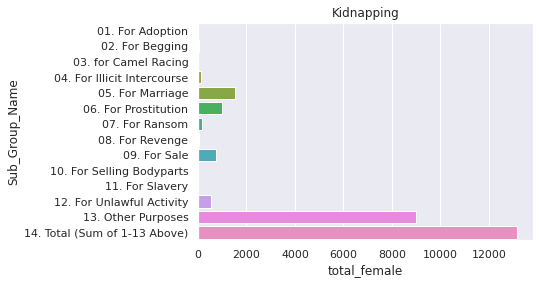

<Figure size 1440x1080 with 0 Axes>

In [ ]:
plt.title("Kidnapping")
sns.barplot(y=kd['Sub_Group_Name'],x=kd['total_female'])
plt.figure(figsize=(20,15))
plt.show()

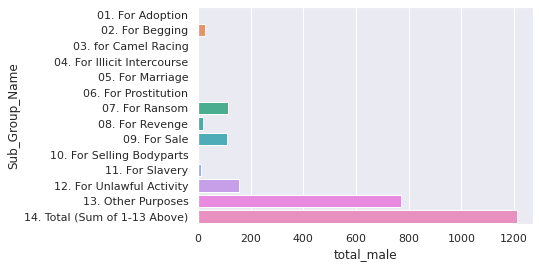

<Figure size 1440x1080 with 0 Axes>

In [ ]:
sns.barplot(y=kd['Sub_Group_Name'],x=kd['total_male'])
plt.figure(figsize=(20,15))
plt.show()

In [ ]:
rape=pd.read_sql_query("SELECT Area_Name,Subgroup,sum(Rape_Cases_Reported+Victims_Above_50_Yrs+Victims_Between_10_14_Yrs+Victims_Between_14_18_Yrs +Victims_Between_18_30_Yrs+Victims_Between_30_50_Yrs+Victims_Upto_10_Yrs+Victims_of_Rape_Total) as total_rape  FROM '20_Victims_of_rape' WHERE Subgroup='Total Rape Victims' GROUP by Area_Name;",conn)

In [ ]:
rape

,Area_Name,Subgroup,total_rape
0,Andaman & Nicobar Islands,Total Rape Victims,252
1,Andhra Pradesh,Total Rape Victims,32088
2,Arunachal Pradesh,Total Rape Victims,1236
3,Assam,Total Rape Victims,38286
4,Bihar,Total Rape Victims,33789
5,Chandigarh,Total Rape Victims,683
6,Chhattisgarh,Total Rape Victims,29253
7,Dadra & Nagar Haveli,Total Rape Victims,147
8,Daman & Diu,Total Rape Victims,42
9,Delhi,Total Rape Victims,15488


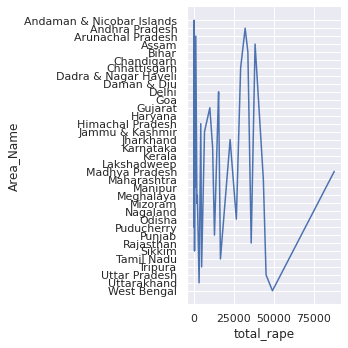

<Figure size 1440x1080 with 0 Axes>

In [ ]:
sns.relplot(y=rape['Area_Name'],x=rape['total_rape'],data=rape,kind="line")
plt.figure(figsize=(20,15))
plt.show()

In [52]:
juvelline=pd.read_sql_query("SELECT * FROM ((SELECT Area_Name,(Family_back_ground_Homeless+Family_back_ground_Living_with_guardian+Family_back_ground_Living_with_parents+Family_back_ground_Total) as family_total FROM '18_03_Juveniles_arrested_Family_background' GROUP BY Area_Name) JOIN (SELECT Area_Name, (Economic_Set_up_Annual_Income_250001_to_50000+Economic_Set_up_Annual_Income_upto_Rs_25000+Economic_Set_up_Middle_income_from_100001_to_200000+Economic_Set_up_Middle_income_from_50001_to_100000+Economic_Set_up_Total+Economic_Set_up_Upper_income_above_Rs_300000+Economic_Set_up_Upper_middle_income_from_200001_to_300000) as economic_total FROM '18_02_Juveniles_arrested_Economic_setup' GROUP BY Area_Name) USING(Area_Name) JOIN (SELECT Area_Name, (Education_Illiterate+Education_Above_Primary_but_below_Matric_or_Higher_Secondary+Education_Above_Primary_but_below_Matric_or_Higher_Secondary+Education_Matric_or_Higher_Secondary_above+Education_Total) as education_total FROM '18_01_Juveniles_arrested_Education' GROUP BY Area_Name) USING (Area_Name))",conn)

In [53]:
juvelline

,Area_Name,family_total,economic_total,education_total
0,Andaman & Nicobar Islands,52,52,38
1,Andhra Pradesh,3898,3898,3673
2,Arunachal Pradesh,162,162,180
3,Assam,770,770,671
4,Bihar,1484,1484,1559
5,Chandigarh,336,336,321
6,Chhattisgarh,4712,4712,4378
7,Dadra & Nagar Haveli,38,38,37
8,Daman & Diu,20,20,21
9,Delhi,1254,1254,1223


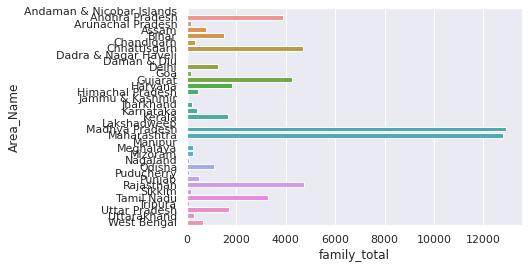

<Figure size 1440x1080 with 0 Axes>

In [55]:
sns.barplot(x=juvelline['family_total'],y=juvelline['Area_Name'])
plt.figure(figsize=(20,15))
plt.show()

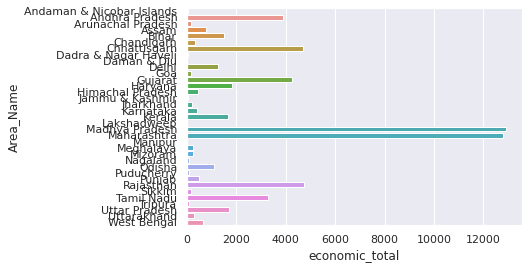

<Figure size 1440x1080 with 0 Axes>

In [56]:
sns.barplot(x=juvelline['economic_total'],y=juvelline['Area_Name'])
plt.figure(figsize=(20,15))
plt.show()

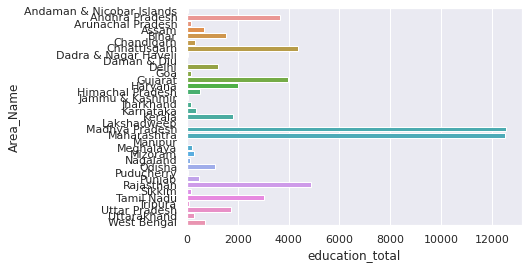

<Figure size 1440x1080 with 0 Axes>

In [57]:
sns.barplot(x=juvelline['education_total'],y=juvelline['Area_Name'])
plt.figure(figsize=(20,15))
plt.show()

In [ ]:
children=pd.read_sql_query("SELECT 'TOTAL_2001_2012'.STATE,'TOTAL_2013'.TOTAL AS TOTAL_2013,'TOTAL_2001_2012'.TOTAL AS TOTAL_2001_2012, SUM('TOTAL_2013'.TOTAL+'TOTAL_2001_2012'.TOTAL) AS TOTAL_AGANIST_CHINDREN FROM (SELECT STATE,SUM(Total)AS TOTAL FROM '03_District_wise_crimes_committed_against_children_2001_2012' WHERE DISTRICT like '%TOTAL%' GROUP BY STATE) AS 'TOTAL_2001_2012' JOIN  (SELECT upper(STATE)AS STATE,SUM(Total)AS TOTAL FROM '03_District_wise_crimes_committed_against_children_2013' WHERE DISTRICT like '%TOTAL%' GROUP BY STATE) AS 'TOTAL_2013'ON 'TOTAL_2001_2012'.STATE = 'TOTAL_2013'.STATE GROUP BY 'TOTAL_2001_2012'.STATE ORDER BY 'TOTAL_2001_2012'.STATE ASC",conn)

In [ ]:
children

,STATE,TOTAL_2013,TOTAL_2001_2012,TOTAL_AGANIST_CHINDREN
0,ANDHRA_PRADESH,2576,16579,19155
1,ARUNACHAL_PRADESH,82,250,332
2,ASSAM,518,1698,2216
3,A_N_ISLANDS,54,245,299
4,BIHAR,1580,9863,11443
5,CHANDIGARH,213,753,966
6,CHHATTISGARH,3737,13160,16897
7,DAMAN_DIU,14,38,52
8,DELHI,7199,25131,32330
9,D_N_HAVELI,14,103,117


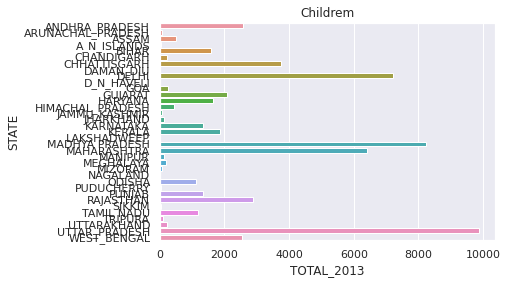

<Figure size 1440x1080 with 0 Axes>

In [28]:
plt.title("Children 2013")
sns.barplot(x=children["TOTAL_2013"],y=children["STATE"])
plt.figure(figsize=(20,15))
plt.show()

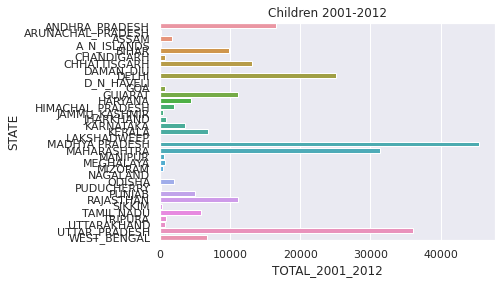

<Figure size 1440x1080 with 0 Axes>

In [30]:
plt.title("Children 2001-2012")
sns.barplot(y=children['STATE'],x=children["TOTAL_2001_2012"])
plt.figure(figsize=(20,15))
plt.show()

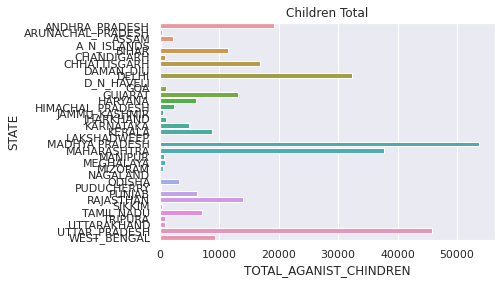

<Figure size 1440x1080 with 0 Axes>

In [31]:
plt.title("Children Total")
sns.barplot(y=children['STATE'],x=children["TOTAL_AGANIST_CHINDREN"])
plt.figure(figsize=(20,15))
plt.show()

In [34]:
women=pd.read_sql_query("SELECT '2001_2012'.STATES,'2013'.TOTAL_OF_2013 AS TOTAL_2013,'TOTAL_2014'.Total AS TOTAL_2014,'2001_2012'.Total_2001_2012 AS TOTAL_2001_2012, SUM('2013'.TOTAL_OF_2013+'TOTAL_2014'.Total+'2001_2012'.Total_2001_2012) as TOTAL_AGANIST_WOMEN FROM (SELECT STATES,sum(Rape+DowryDeaths+Assaultonwomenwithintenttooutragehermodesty+InsulttomodestyofWomen+CrueltybyHusbandorhisRelatives+ImportationofGirls) as Total_2001_2012 FROM '42_District_wise_crimes_committed_against_women_2001_2012' GROUP BY STATES)AS '2001_2012' INNER JOIN (SELECT STATE,sum(tOTAL_OF_2013) AS TOTAL_OF_2013 FROM (SELECT UPPER(STATE) as STATE,sum(Rape+KidnappingandAbduction+DowryDeaths+Assaultonwomenwithintenttooutragehermodesty+InsulttomodestyofWomen+CrueltybyHusbandorhisRelatives+ImportationofGirls) as TOTAL_OF_2013 FROM '42_District_wise_crimes_committed_against_women_2013'GROUP BY STATE)GROUP BY STATE) AS '2013' ON '2001_2012'.STATES = '2013'.STATE INNER JOIN(SELECT upper(States) AS STATE,sum(Rape+CustodialRape+Custodial_GangRape+Custodial_OtherRape+RapeotherthanCustodial+Rape_GangRape+Rape_Others+AttempttocommitRape+KidnappingAbduction_Total+KidnapingAbduction+KidnapingAbductioninordertoMurder+KidnappingforRansom+KidnappingAbductionofWomentocompelherformarriage+KidnapingAbduction_Others+DowryDeaths+AssaultonWomenwithintenttooutrageherModesty_Total+SexualHarassment+AssaultonwomenwithintenttoDisrobe+Voyeurism+Stalking+Others+InsulttotheModestyofWomen_Total+AtOfficepremises+InsulttotheModestyofWomen_Total+AtOfficepremises+Inplacesrelatedtowork+InPublicTransportsystem+InotherPlaces+CrueltybyHusbandorhisRelatives+ImportationofGirlsfromForeignCountry+Murder+AttempttocommitMurder+CulpableHomicidenotamountingtoMurder+AttempttocommitCulpableHomicide+GrievousHurt+Hurt+Acidattack+AttempttoAcidAttack+Deathscausedwithintenttocausemiscarriage+Causingmiscarriagewithoutconsentofwomen+DacoitywithMurder+OtherDacoity+Robbery+Arson+HumanTrafficking+AbetmentofSuicidesofWomen+UnNaturalOffences+OtherIPCCrimes +DowryProhibitionAct1961+ProtectionofWomenfromDomesticViolenceAct2005+ImmoralTrafficPreventionAct+ITPUnderSection5+ITPUnderSection6+ITPUnderSection7+ ITPUnderSection8+ITPUnderOtherSections+OtherSLLCrimesagainstWomen) as Total FROM 'NEW_42_District_wise_crimes_committed_against_women_2014' GROUP by States) AS 'TOTAL_2014' ON  '2001_2012'.STATES = 'TOTAL_2014'.STATE GROUP by States",conn)

In [35]:
women

,STATES,TOTAL_2013,TOTAL_2014,TOTAL_2001_2012,TOTAL_AGANIST_WOMEN
0,A&NISLANDS,204,570,986,1760
1,ANDHRA PRADESH,60876,60582,453696,575154
2,ARUNACHAL PRADESH,572,1608,2942,5122
3,ASSAM,34780,61534,141164,237478
4,BIHAR,23304,55150,121188,199642
5,CHANDIGARH,962,1802,3174,5938
6,CHHATTISGARH,13986,36626,86896,137508
7,D&NHAVELI,38,96,298,432
8,DAMAN&DIU,36,68,150,254
9,DELHI,25706,75290,64878,165874


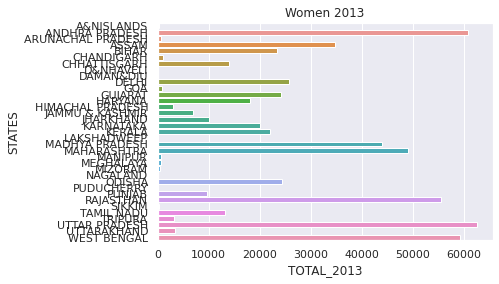

<Figure size 1440x1080 with 0 Axes>

In [39]:
plt.title("Women 2013")
sns.barplot(x=women["TOTAL_2013"],y=women["STATES"])
plt.figure(figsize=(20,15))
plt.show()

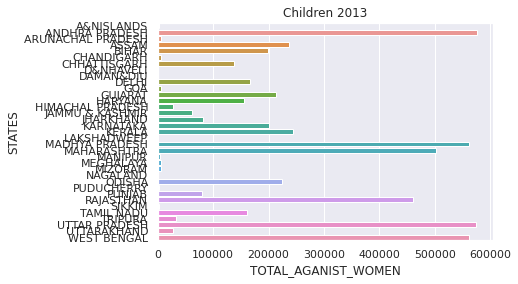

<Figure size 1440x1080 with 0 Axes>

In [43]:
plt.title("Children 2013")
sns.barplot(x=women["TOTAL_AGANIST_WOMEN"],y=women["STATES"])
plt.figure(figsize=(20,15))
plt.show()

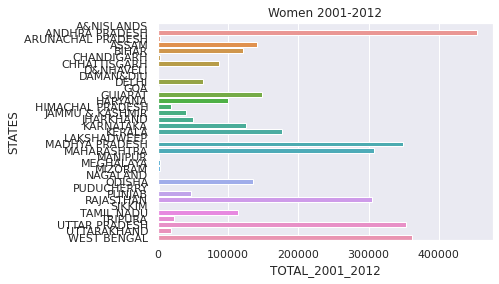

<Figure size 1440x1080 with 0 Axes>

In [44]:
plt.title("Women 2001-2012")
sns.barplot(x=women["TOTAL_2001_2012"],y=women["STATES"])
plt.figure(figsize=(20,15))
plt.show()

In [46]:
arrest=pd.read_sql_query("SELECT * FROM ((SELECT Area_Name ,sum(AC01_No_of_cases_pending_investigation_from_previous_year + AC02_No_of_cases_registered_during_the_year+ AC03_Total_No_of_cases_for_investigation_during_the_year+ AC04_No_of_cases_investigated_during_the_year+AC05_No_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year+AC06_No_of_cases_transferred_to_local_police_during_the_year+AC06_No_of_cases_transferred_to_local_police_during_the_year+AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature+AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year+AC09_No_of_cases_pending_departmental_sanction_for_prosecution_during_the_year) as total_cases FROM '23_Anti_corruprion_cases' GROUP BY Area_Name) JOIN (SELECT Area_Name, sum(ACA01_No_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_beginning_of_the_year+ACA02_No_of_persons_arrested_during_the_year +ACA04_No_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_end_of_the_year+ACA05_No_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year +ACA06_No_of_persons_under_trial_at_the_beginning_of_the_year+ACA07_Total_No_of_persons_under_trial_during_the_year+ACA08_No_of_persons_whose_cases_were_withdrawn_or_otherwise_disposed_off_during_the_year+ ACA09_No_of_persons_in_custody_or_on_bail_during_the_stage_of_trial_at_the_end_of_the_year+ACA10_No_of_persons_in_whose_cases_trials_were_completed_during_the_year +ACA11_No_of_persons_convicted_during_the_year+ACA12_No_of_persons_acquitted_during_the_year+ACA13_Percentage_of_persons_convicted_to_total_persons_in_whose_cases_trials_were_completed_during_the_year+ ACA14_No_of_persons_involved_in_the_cases_reported_for_Regular_Departmental_Action_during_the_year+ACA15_No_of_persons_involved_in_the_cases_reported_for_suitable_action_during_the_year+ACA161_No_of_persons_dismissed_from_Service_during_the_year+ACA162_No_of_persons_removed_from_service_during_the_year+ACA162_No_of_persons_removed_from_service_during_the_year+ACA163_No_of_persons_awarded_other_major_punishments_during_the_year+ACA164_No_of_persons_awarded_minor_punishments_during_the_year+ACA19_No_of_private_persons_involved_during_the_year) as total_areest  FROM '24_Anti_corruption_arrests' GROUP BY Area_Name) USING (Area_Name));",conn)

In [47]:
arrest

,Area_Name,total_cases,total_areest
0,Andaman & Nicobar Islands,328.0,396.0
1,Andhra Pradesh,16002.0,51594.0
2,Arunachal Pradesh,84.0,21.0
3,Assam,2365.0,3357.0
4,Bihar,9049.0,29264.0
5,Chandigarh,761.0,3977.0
6,Chhattisgarh,3855.0,9256.0
7,Dadra & Nagar Haveli,18.0,124.0
8,Daman & Diu,40.0,224.0
9,Delhi,5045.0,24438.0


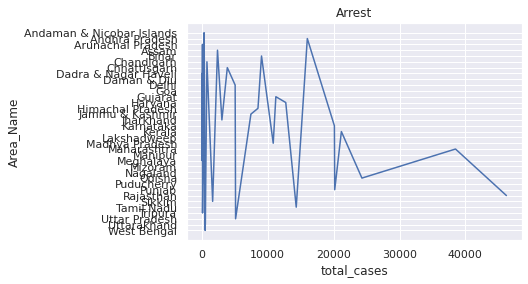

<Figure size 1440x1080 with 0 Axes>

In [49]:
plt.title("Cases")
sns.lineplot(x=arrest["total_cases"],y=arrest["Area_Name"])
plt.figure(figsize=(20,15))
plt.show()

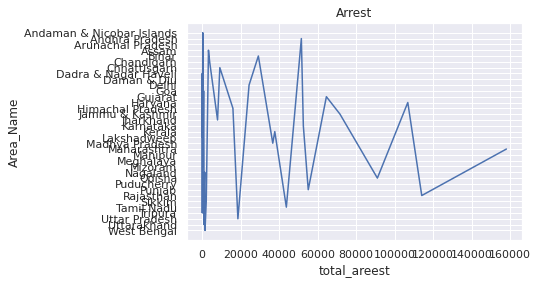

<Figure size 1440x1080 with 0 Axes>

In [50]:
plt.title("Arrest")
sns.lineplot(x=arrest["total_areest"],y=arrest["Area_Name"])
plt.figure(figsize=(20,15))
plt.show()